In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from tqdm import trange
from model import Siamese

/home/taiger/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=False)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
h, w, c = 28, 28, 1
batch_size = 128
model_path = 'model/siamese/model'

In [4]:
tf.reset_default_graph()
siamese = Siamese()
saver = tf.train.Saver()
sess = tf.Session()
saver.restore(sess, model_path)

INFO:tensorflow:Restoring parameters from model/siamese/model


In [5]:
x1, y1 = mnist.train.next_batch(batch_size)
x2, y2 = mnist.train.next_batch(batch_size)
x1 = x1.reshape([-1, h, w, c])
x2 = x2.reshape([-1, h, w, c])
y_true = y1 == y2

d = sess.run(siamese.dist, feed_dict={
    siamese.x1: x1,
    siamese.x2: x2,
    siamese.keep_prob: 1.0,
})
d.shape

(128,)

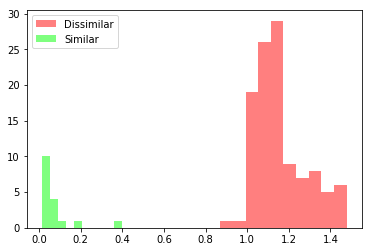

In [6]:
plt.hist(d[y_true == 0], color=(1, 0, 0, 0.5), label='Dissimilar')
plt.hist(d[y_true == 1], color=(0, 1, 0, 0.5), label='Similar')
plt.legend();

In [8]:
accuracies = []
for i in trange(1000):
    x1, y1 = mnist.test.next_batch(batch_size)
    x2, y2 = mnist.test.next_batch(batch_size)
    x1 = x1.reshape([-1, h, w, c])
    x2 = x2.reshape([-1, h, w, c])
    y_true = y1 == y2

    d = sess.run(siamese.dist, feed_dict={
        siamese.x1: x1,
        siamese.x2: x2,
        siamese.keep_prob: 1.0,
    })
    y_pred = d < 0.5
    accuracies.append(np.sum(y_true == y_pred) / batch_size)
sum(accuracies) / len(accuracies)

100%|██████████| 1000/1000 [00:03<00:00, 300.33it/s]


0.997546875